<a href="https://colab.research.google.com/github/Najwaalya/MachineLearning_2025/blob/main/ML_JS06_Praktikum_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install annoy

Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 0.5255 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.097 ms


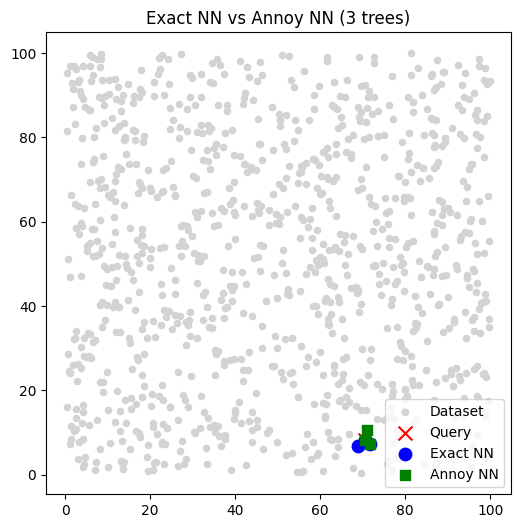

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()


===== Metric: EUCLIDEAN | Trees: 3 | Data: 1000 =====
Exact NN index: [219 898 593], jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.2793)]
Annoy NN index: [219, 898, 770], jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.5682)]
Waktu Exact : 0.1402 ms
Waktu Annoy : 0.03 ms


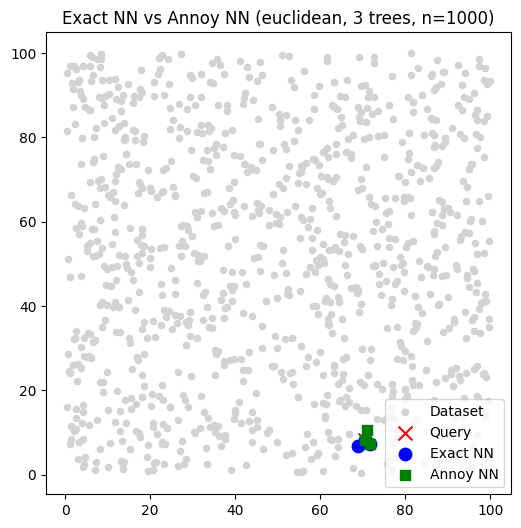


===== Metric: EUCLIDEAN | Trees: 8 | Data: 1000 =====
Exact NN index: [219 898 593], jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.2793)]
Annoy NN index: [219, 898, 593], jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.2793)]
Waktu Exact : 0.2398 ms
Waktu Annoy : 0.0472 ms


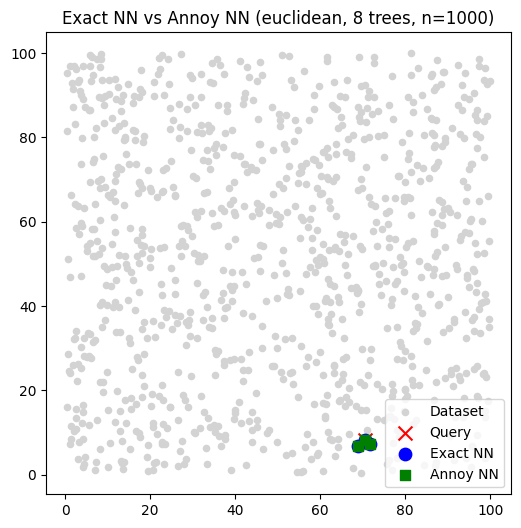


===== Metric: EUCLIDEAN | Trees: 3 | Data: 100000 =====
Exact NN index: [64040 64186 88792], jarak: [np.float64(0.0), np.float64(0.158), np.float64(0.2533)]
Annoy NN index: [64040, 64186, 88792], jarak: [np.float64(0.0), np.float64(0.158), np.float64(0.2533)]
Waktu Exact : 18.3964 ms
Waktu Annoy : 0.0412 ms

===== Metric: ANGULAR | Trees: 3 | Data: 1000 =====
Exact NN index: [219 898 593], jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.2793)]
Annoy NN index: [219, 429, 540], jarak: [np.float64(0.0), np.float64(14.2263), np.float64(8.0507)]
Waktu Exact : 0.2193 ms
Waktu Annoy : 0.0353 ms


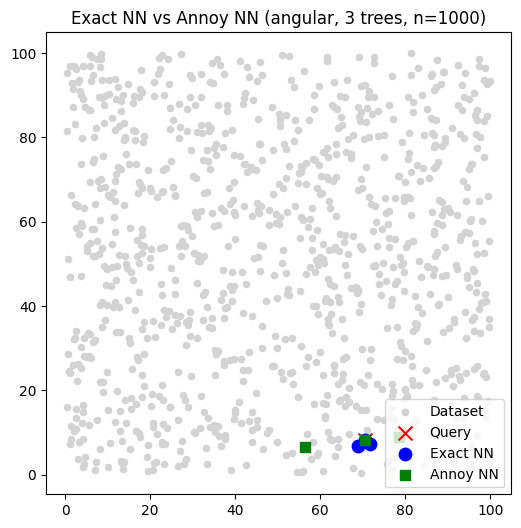


===== Metric: ANGULAR | Trees: 8 | Data: 1000 =====
Exact NN index: [219 898 593], jarak: [np.float64(0.0), np.float64(1.3692), np.float64(2.2793)]
Annoy NN index: [219, 429, 540], jarak: [np.float64(0.0), np.float64(14.2263), np.float64(8.0507)]
Waktu Exact : 0.3383 ms
Waktu Annoy : 0.0367 ms


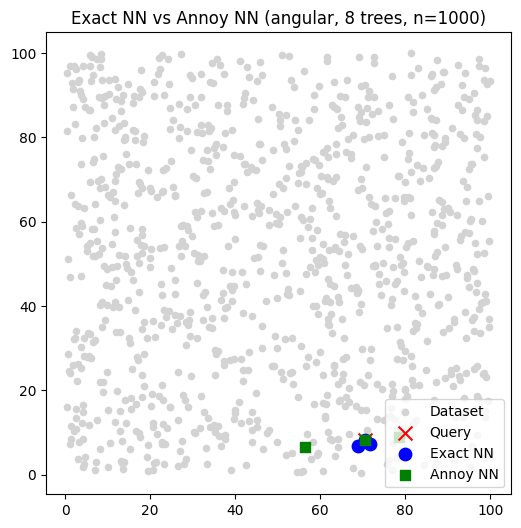


===== Metric: ANGULAR | Trees: 3 | Data: 100000 =====
Exact NN index: [64040 64186 88792], jarak: [np.float64(0.0), np.float64(0.158), np.float64(0.2533)]
Annoy NN index: [64040, 1310, 9720], jarak: [np.float64(0.0), np.float64(13.2379), np.float64(54.7366)]
Waktu Exact : 14.3495 ms
Waktu Annoy : 0.0417 ms


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from annoy import AnnoyIndex

# Fungsi pembanding ENN vs ANN
def compare_annoy(metric='euclidean', n_trees=3, n_points=1000, plot=True):
    np.random.seed(42)
    f = 2  # dimensi
    X = np.random.rand(n_points, f) * 100
    query = X[np.random.randint(0, n_points)]

    # ---- Exact NN (Brute Force) ----
    start = time.time()
    distances = np.linalg.norm(X - query, axis=1)
    idx_exact = np.argsort(distances)[:3]
    time_exact = time.time() - start

    # ---- Annoy NN ----
    t = AnnoyIndex(f, metric)
    for i, vec in enumerate(X):
        t.add_item(i, vec)
    t.build(n_trees)

    start = time.time()
    idx_ann = t.get_nns_by_vector(query, 3)
    time_ann = time.time() - start

    # ---- Output hasil ----
    print(f"\n===== Metric: {metric.upper()} | Trees: {n_trees} | Data: {n_points} =====")
    print(f"Exact NN index: {idx_exact}, jarak: {[round(distances[i],4) for i in idx_exact]}")
    print(f"Annoy NN index: {idx_ann}, jarak: {[round(np.linalg.norm(X[i]-query),4) for i in idx_ann]}")
    print(f"Waktu Exact : {round(time_exact*1000,4)} ms")
    print(f"Waktu Annoy : {round(time_ann*1000,4)} ms")

    # ---- Visualisasi ----
    if plot and n_points <= 1000:
        plt.figure(figsize=(6,6))
        plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
        plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")
        plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")
        plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")
        plt.legend()
        plt.title(f"Exact NN vs Annoy NN ({metric}, {n_trees} trees, n={n_points})")
        plt.show()

# ---- Eksekusi beberapa konfigurasi ----
configs = [
    ('euclidean', 3, 1000),
    ('euclidean', 8, 1000),
    ('euclidean', 3, 100000),
    ('angular', 3, 1000),
    ('angular', 8, 1000),
    ('angular', 3, 100000),
]

for metric, trees, n in configs:
    compare_annoy(metric, trees, n, plot=(n <= 1000))

In [ ]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 50_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

Exact NN result: [ 4829797 46172387  3304359 44491395 44980244]
Exact NN time: 10.706 seconds


In [1]:
import numpy as np
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# ==== Konfigurasi ====
n_tracks = 1_000_000   # 1 juta data, realistis untuk laptop i7 16GB
n_features = 20        # contoh fitur lagu
n_trees = 8            # jumlah pohon untuk Annoy
n_neighbors = 5        # jumlah lagu terdekat
metrics = ['euclidean', 'angular']  # dua jenis jarak

# ==== Dataset simulasi ====
np.random.seed(42)
X = np.random.rand(n_tracks, n_features).astype(np.float32)
query = np.random.rand(1, n_features).astype(np.float32)

# ==== Loop percobaan untuk setiap metric ====
for metric in metrics:
    print(f"\n===== Metric: {metric.upper()} | Trees: {n_trees} | Data: {n_tracks:,} =====")

    # ---- Exact NN (Brute Force) ----
    start = time.time()
    distances = euclidean_distances(query, X)[0] if metric == 'euclidean' else np.arccos(np.clip(np.dot(X, query.T).flatten(), -1.0, 1.0))
    idx_exact = np.argsort(distances)[:n_neighbors]
    time_exact = time.time() - start

    # ---- Approx NN (Annoy) ----
    f = n_features
    annoy_index = AnnoyIndex(f, metric)
    for i in range(n_tracks):
        annoy_index.add_item(i, X[i])
    annoy_index.build(n_trees)

    start = time.time()
    idx_ann = annoy_index.get_nns_by_vector(query[0], n_neighbors)
    time_ann = time.time() - start

    # ---- Hasil ----
    print(f"Exact NN index : {idx_exact.tolist()}")
    print(f"Annoy NN index : {idx_ann}")
    print(f"Waktu Exact NN : {round(time_exact, 4)} detik")
    print(f"Waktu Annoy NN : {round(time_ann, 4)} detik")
    print(f"Annoy lebih cepat ≈ {round(time_exact/time_ann, 1)}×")



===== Metric: EUCLIDEAN | Trees: 8 | Data: 1,000,000 =====
Exact NN index : [229350, 553886, 763448, 256344, 308000]
Annoy NN index : [302976, 222986, 172822, 480495, 85964]
Waktu Exact NN : 0.7577 detik
Waktu Annoy NN : 0.0001 detik
Annoy lebih cepat ≈ 8211.9×

===== Metric: ANGULAR | Trees: 8 | Data: 1,000,000 =====
Exact NN index : [999999, 999998, 999997, 999996, 999995]
Annoy NN index : [759786, 222986, 26618, 896101, 845319]
Waktu Exact NN : 0.0306 detik
Waktu Annoy NN : 0.0001 detik
Annoy lebih cepat ≈ 424.9×
